In [1]:
# File created by rydhslmy at 2022/11/30 09:00 AM.
# Description : Reinforcement Learning Algorithm for finding shortest path in a Maze.
# Purpose : Act as comparison for the Deep Q-Network models that is to be created.

In [2]:
# ---------- Import Libraries ---------- #
import os
import random
import math
from IPython.display import SVG
import numpy as np

# Import Custom libraries
from lib import qLearning as ql
from lib import support as fn
from lib import drawSVG

File 'maze_config' exist in 'd:\PME_ITB\softwares\RL_Sim'
8 maze cofing file(s) detected.
1) 22083010X10c4.txt
2) 22100605X05c0.txt
3) 22100605X05c1.txt
4) 22100605X05c2.txt
5) 22100605X05c3.txt
6) 22100605X05c4.txt
7) 22113040X40c0.txt
8) 22113040X40c1.txt

Selected '22100605X05c0.txt'
Loading 22100605X05c0.txt...
	File consists of 53 lines of data.
	Maze size loaded. 5X5 (25 states)
	Number of action loaded. There are 4 actions
	Next State list loaded.
	Current Reward list loaded.
Finish loading 22100605X05c0.txt


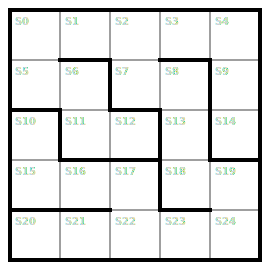

In [3]:
# ---------- Load Maze Config ---------- #
## Target maze config file
config_file = 'maze_config'
current_dir = os.getcwd()
config_path = fn.gen_path(current_dir, config_file)

## Select maze config file
mazeConfig_file = fn.select_maze(config_path)


## Read maze config file
maze_config = fn.load_mazeConfig(config_path, mazeConfig_file)

## Pass content of maze_config
maze_x = maze_config[0]
maze_y = maze_config[1]
total_state = maze_config[2]
total_act = maze_config[3]
ns_list = maze_config[4]
rt_list = maze_config[5]

## Display Maze
scale = 50*maze_x
maze_svg = 'current_maze.svg'
fn.draw_maze(scale, maze_x, maze_y, ns_list, maze_svg)
display(SVG(maze_svg))


In [4]:
# Select goal state randomly from possible candidates
possible_goals = fn.find_goals(ns_list)
goal_state = random.choice(possible_goals)
# goal_state = 3
print(possible_goals)
print(goal_state)

[10, 12, 14, 20]
10


In [5]:
# Set Goal State Reward
goal_reward = 10

# Update Reward Matrix
if (goal_state > (total_state-1)):
    print("Goal State cannot be used. Try again")
else:
    for i in range(total_state):
        for j in range(total_act):
            if (ns_list[i][j]==goal_state)&(i != goal_state):
                rt_list[i][j] = goal_reward
    print('Current Reward list updated.')

Current Reward list updated.


In [6]:
# Set simulation's hyparameters
total_episode = 10000
max_step = 10*total_state
alpha = 0.125 # Learning Rate
gamma = 0.875 # Discount Factor
epsilon = 0.99

In [7]:
# Brute force learning

# Initialize Software Model
sw = ql.qrl(total_state = total_state,
            total_action = total_act,
            learning_rate = alpha, 
            discount_factor = gamma,
            initial_exploration_rate = epsilon,
            max_episode = total_episode,
            max_step = max_step,
            goal_state = goal_state,
            reward_matrix = rt_list,
            ns_matrix = ns_list,
            random_pool = possible_goals
           )

notFinished = True
while(notFinished):
    # Start software learning
    %time sw.start()
    
    # Check convergence
    pass_count = 0
    failed_start = []
    for start_state in possible_goals:
        if (start_state != goal_state):
            isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=True)
            if (isPass):
                pass_count += 1
            else:
                failed_start.append(start_state)
    print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')
    if (pass_count==len(possible_goals)-1):
        notFinished = False
    else:
        print(failed_start)
        total_episode += 1000
    print()
    notFinished = False

Start Q-learning...
Progress:[====================================================================================================] (100/100)Execution time = 3.5805716514587402s
Finished learning for 10000 episode(s)
Wall time: 3.58 s
Goal reached count: 3/3



In [8]:
pass_count = 0

for start_state in possible_goals:
    if (start_state != goal_state):
        isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=False)
        if (isPass):
            pass_count += 1
#         scale = 1000
#         svg_file = 'shortest_path.svg'
#         h = drawSVG.drawPath(scale=scale, mx=maze_x, my = maze_y, ns = ns_list, path = record)
#         h.draw_path(svg_file)
#         display(SVG(svg_file))

print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')

Shortest Path from S012 to S010.
Agent requires 18 step to reach  S010 from S012
Shortest Path from S014 to S010.
Agent requires 16 step to reach  S010 from S014
Shortest Path from S020 to S010.
Agent requires 6 step to reach  S010 from S020
Goal reached count: 3/3


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

In [12]:
svc_dummy = np.array([val for val in range(25)])
print(svc_dummy)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


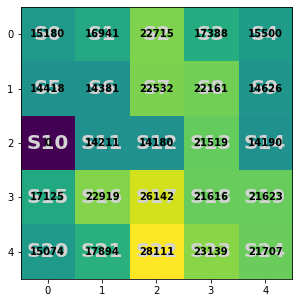

In [13]:
svc = sw.state_visit_count.reshape((maze_x, maze_y))
fn.vis_svc(svc)

In [14]:
svc.shape

(5, 5)

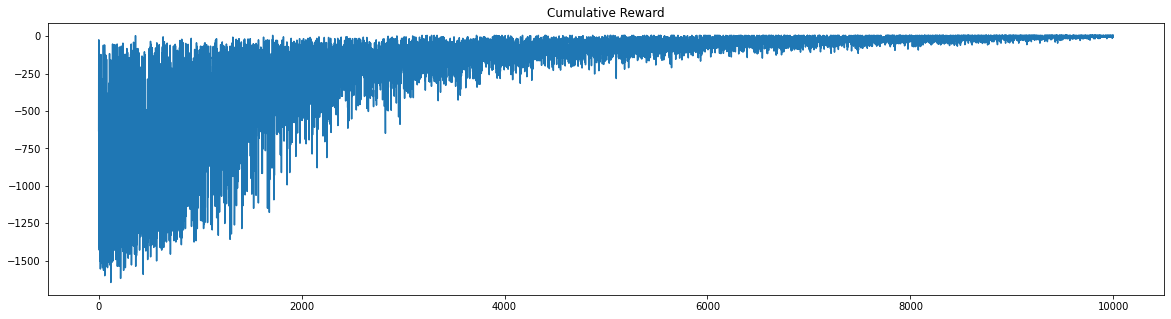

In [15]:
fn.plot(sw.cumulative_rewards, title='Cumulative Reward')

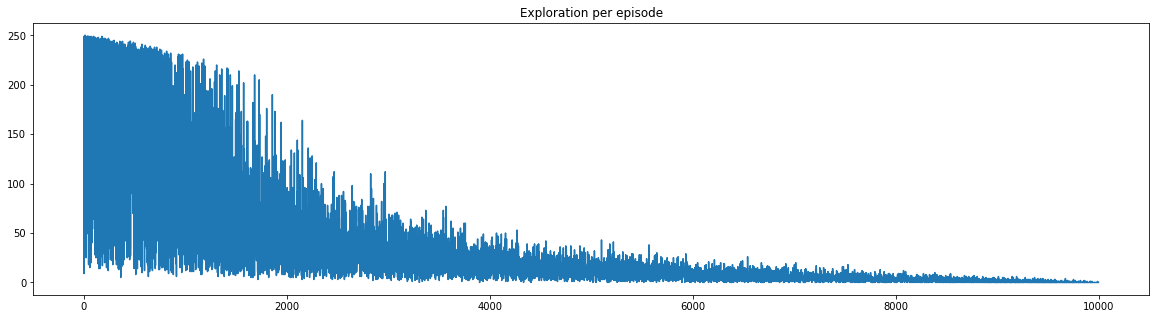

In [16]:
fn.plot(sw.exploration_per_episode, title='Exploration per episode')

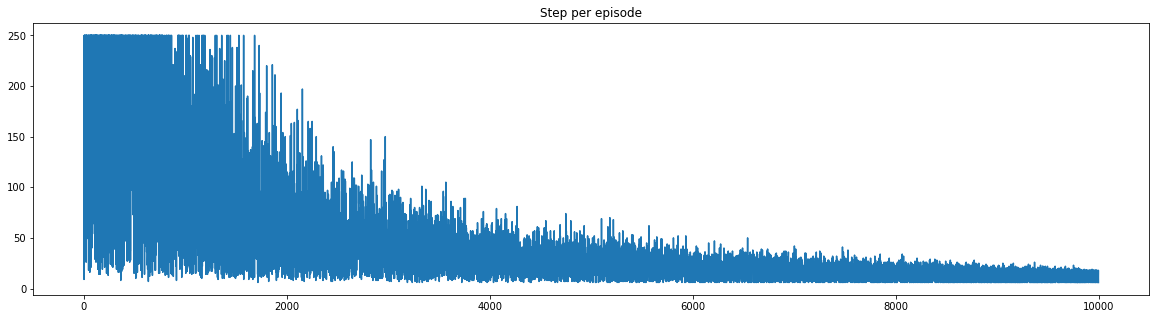

In [17]:
fn.plot(sw.step_per_episode, title='Step per episode')

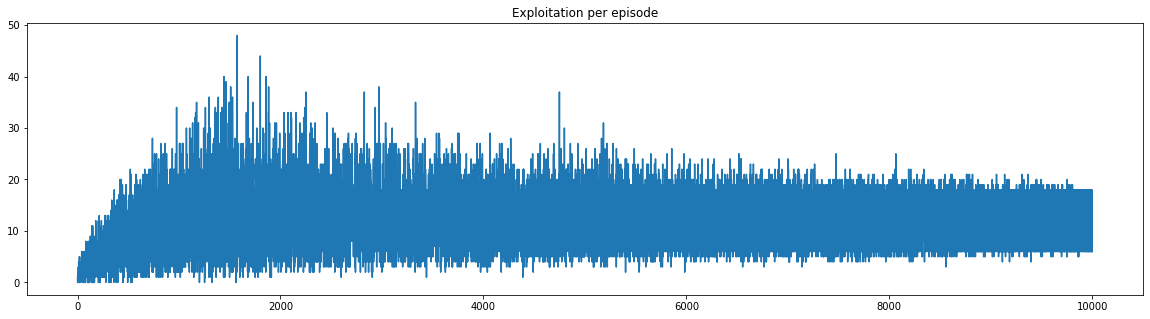

In [18]:
array1 = np.array(sw.step_per_episode)
array2 = np.array(sw.exploration_per_episode)
subtracted_array = np.subtract(array1, array2)
exploit = list(subtracted_array)

fn.plot(exploit, title='Exploitation per episode')

In [19]:
fn.display_qTable(sw.Q, gen_file=True, show=False)